# Using acoustic speaker data to predict height

In [1]:
#import packages
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,time,f1,f2,f3,f4,b1,b2,b3,b4,...,ntime,sf1,sf2,sf3,sf4,sf0,vowel,speaker,true height,gender
0,1,25.171171,976.90,1632.86,2636.22,4059.48,156.450106,222.210000,292.333892,294.941931,...,0.000000,974.765004,1636.908060,2624.342151,4079.103343,226.412835,a,11,69,F
1,2,28.144144,975.39,1631.37,2626.86,4065.88,156.447433,226.743485,303.320624,259.105758,...,0.014493,975.846417,1637.739555,2624.477781,4079.485941,226.371576,a,11,69,F
2,3,31.117117,976.52,1631.43,2619.63,4071.57,158.010292,231.238515,311.059737,237.521053,...,0.028986,979.024270,1640.188245,2624.878045,4080.604028,226.248368,a,11,69,F
3,4,34.090090,978.71,1633.49,2614.18,4077.81,159.782326,240.878601,309.315260,213.708116,...,0.043478,984.104022,1644.119611,2625.523514,4082.370601,226.044907,a,11,69,F
4,5,37.063063,984.71,1641.31,2612.90,4084.18,165.184203,251.804602,305.311886,200.772406,...,0.057971,990.776480,1649.318844,2626.383238,4084.647581,225.763988,a,11,69,F


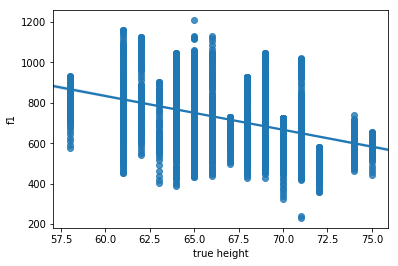

In [7]:
#model f1 regression plot
f1 = sns.regplot('true height','f1', data=data)
plt.show()

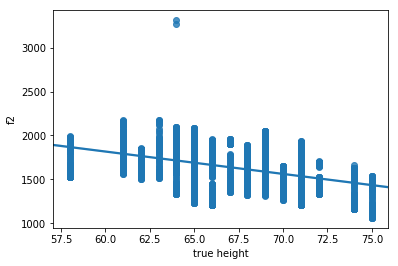

In [8]:
#model f2 regression plot
f2 = sns.regplot('true height','f2', data=data)
plt.show()

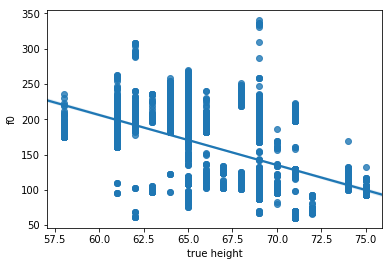

In [9]:
#model f0 regression plot
f0 = sns.regplot('true height', 'f0', data=data)
plt.show()

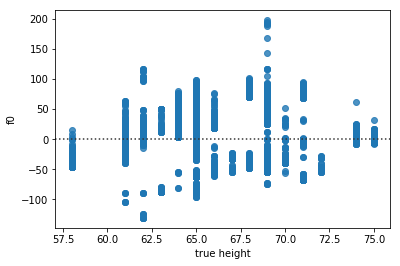

In [10]:
#plot residuals for f0
sns.residplot(data['true height'], data['f0'])
plt.show()

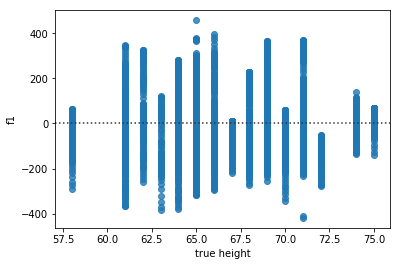

In [11]:
#plot residuals for f1
sns.residplot(data['true height'], data['f1'])
plt.show()

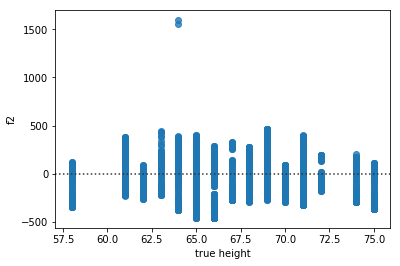

In [12]:
#plot residuals for f2
sns.residplot(data['true height'], data['f2'])
plt.show()

## We can see from the residual plots that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

## Build regression model for f0

In [17]:
lm = LinearRegression()

In [18]:
X = data[['f0']]
Y = data[['true height']]
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([[63.78399907],
       [63.81841866],
       [63.85682916],
       [63.91593273],
       [64.01546319]])

In [19]:
 lm.intercept_

array([72.83635008])

In [20]:
 lm.coef_

array([[-0.03837305]])

## Build multiple linear regression model

In [28]:
Z = data[['f0', 'f1', 'f2', 'f3']]
lm.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.intercept_

array([91.89519259])

In [30]:
 lm.coef_

array([[-0.00777196, -0.00461944, -0.00247504, -0.00600698]])